# Assignment 1 (Part 1) - Getting and parsing texts 

### Retrieve Songs of Innocence and of Experience by William Blake from Project Gutenberg.

In [189]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup 
import re

#extract the data 
r=requests.get("https://www.gutenberg.org/cache/epub/1934/pg1934.txt")
data=BeautifulSoup(r.content).text

#type(data)
#data

In [190]:
#split strings 
split=data.split('\r\n\r\n\r\n\r\n\r\n')

# create contents element
contents=split[2]
contents

#create a list of books and list of titles - working
b=re.compile("[A-Z]+\s[A-Z]+\s[A-Z]+")
books=b.findall(contents) #book finder
books

#check how the split looks like
#contents


['SONGS OF INNOCENCE', 'SONGS OF EXPERIENCE']

In [191]:
#poems:
#split[3:52]

### Parse this into a dataframe where each row is a line of a poem (there should be no empty lines). The following columns should describe where each line was found:
• line_number
• stanza_number
• poem_title
• book_title


In [192]:
#select part with poems
poems=split[4:52]
rows=[]

book_title="SONGS OF INNOCENCE"
for poem in poems:
    if poem==books[1]:
        book_title=poem
        poems.remove(poem)
        print(book_title)
    
    else:
        splitted_poem=poem.split("\n")
        #print (splitted_poem) #it's a list -> Can't split it anymore
        title_poem=splitted_poem[0]
        splitted_poem=splitted_poem[3:]  #remove title of poem
        #print(splitted_poem)
        
        #create list with stanza number   
        stanza=1
        count=0
        for x in splitted_poem:        
            if x == ('\r'):
                stanza+=1
                splitted_poem.remove(x)
            else:
                count+=1                
                rows.append([x, count, stanza, title_poem, book_title])                          
                
df1=pd.DataFrame(rows, columns=["Line","line_number", "stanza_number", "poem_title","book_title"])

#look at the dataframe
#df1
            

SONGS OF EXPERIENCE


2 days later.... the dataframe is ready (almost!!)
todos:
1. remove "\r" from every line -done!
2. change book 1 to book 2 -> done! 




In [193]:
# last cleaning remove \r
df1["Line"] = [line.replace("\r", "") for line in df1.Line]
df1["poem_title"]=[title.replace("\r", "") for title in df1.poem_title]

#final dataframe
df1

,Line,line_number,stanza_number,poem_title,book_title
0,"Piping down the valleys wild,",1,1,INTRODUCTION,SONGS OF INNOCENCE
1,"Piping songs of pleasant glee,",2,1,INTRODUCTION,SONGS OF INNOCENCE
2,"On a cloud I saw a child,",3,1,INTRODUCTION,SONGS OF INNOCENCE
3,And he laughing said to me:,4,1,INTRODUCTION,SONGS OF INNOCENCE
4,So I piped with merry cheer.,5,2,INTRODUCTION,SONGS OF INNOCENCE
...,...,...,...,...,...
732,Tangled roots perplex her ways;,7,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
733,How many have fallen there!,8,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
734,They stumble all night over bones of the dead;,9,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
735,And feel—they know not what but care;,10,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE


# Visualizing text data 


In [194]:
df2= pd.read_csv('innocence_experience.csv')
df2.head(5)

,book,poem,line_n,stanza_n,text
0,SONGS OF INNOCENCE,INTRODUCTION,0,0,"Piping down the valleys wild,"
1,SONGS OF INNOCENCE,INTRODUCTION,1,0,"Piping songs of pleasant glee,"
2,SONGS OF INNOCENCE,INTRODUCTION,2,0,"On a cloud I saw a child,"
3,SONGS OF INNOCENCE,INTRODUCTION,3,0,And he laughing said to me:
4,SONGS OF INNOCENCE,INTRODUCTION,4,1,‘Pipe a song about a Lamb!’


###  Create a histogram showing the number of lines per poem


In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

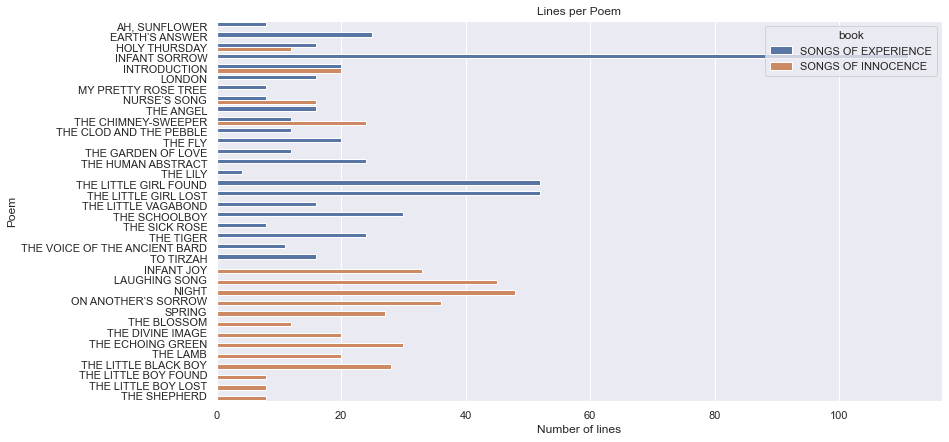

In [196]:
# Create a barplot showing the number of lines per poem 

bp = (df2
.groupby(['book',"poem"], as_index=False)
.count()
#.reset_index()
)

#can be better 
ax = sns.barplot(
    y="poem",
    x="line_n",
    hue="book",
    data=bp,
    )
ax.set(xlabel="Number of lines", ylabel="Poem")
ax.set_title('Lines per Poem')
sns.set(rc = {'figure.figsize':(13, 7)})

#plt.savefig("plots/pubs_time_bar_sns.png")


I did a barplot because it was not possible to have have the number of lines for each poem in a histogram 

There are 3 poem titles which are present in  both of the books. 

### Create a document feature matrix treating each line as a document

In [197]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pprint

lines=df2.text
vectorizer = CountVectorizer(stop_words="english")
vects= vectorizer.fit_transform(lines)
dfm1=pd.DataFrame(vects.todense(),
        columns=vectorizer.get_feature_names_out())
dfm1

,abroad,ache,admired,afar,age,aged,agree,ah,air,albion,...,wrath,wren,writ,write,wrote,year,young,youth,youthful,zeal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create a separate document feature matrix treating each poem as a document

In [201]:
data = (df2
       .groupby(['book', 'poem'])['text'] 
       .aggregate(lambda x: ' '.join(x))
       .reset_index()
       )

poems=data.text

vectorizer = CountVectorizer(stop_words="english")
vects= vectorizer.fit_transform(poems)
dfm2=pd.DataFrame(vects.todense(),
        columns=vectorizer.get_feature_names_out())
#dfm2

In [202]:
#get poem titles and book titles in the document feature matrix 
poem_titles=[]
poem_book=[]

for p in (bp.poem):
    poem_titles.append(p)
    
for b in (bp.book):    
    poem_book.append(b)
    
idx=0
#dfm2.insert(loc=idx, column="titles", value=poem_titles)
dfm2.insert(loc=idx, column="poem_book", value=poem_book)


dfm2

,poem_book,abroad,ache,admired,afar,age,aged,agree,ah,air,...,wrath,wren,writ,write,wrote,year,young,youth,youthful,zeal
0,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SONGS OF EXPERIENCE,0,0,1,1,2,0,1,0,0,...,3,0,0,0,0,0,0,1,1,1
4,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Using one of these document feature matrices, create a plot that compares the frequency of words in each book. 


In [203]:
col_names=[]
for col in dfm2.columns:
    
    col_names.append(col)


data=(dfm2
    .groupby("poem_book")
    .sum())
    
#print(data)

                     abroad  ache  admired  afar  age  aged  agree  ah  air  \
poem_book                                                                     
SONGS OF EXPERIENCE       0     1        1     1    2     0      1   2    0   
SONGS OF INNOCENCE        1     0        0     0    0     1      0   0    1   

                     albion  ...  wrath  wren  writ  write  wrote  year  \
poem_book                    ...                                          
SONGS OF EXPERIENCE       1  ...      3     0     1      0      0     1   
SONGS OF INNOCENCE        0  ...      1     1     0      1      1     3   

                     young  youth  youthful  zeal  
poem_book                                          
SONGS OF EXPERIENCE      0      6         3     1  
SONGS OF INNOCENCE       1      1         0     0  

[2 rows x 1093 columns]


In [204]:
data_sorted=(data
 .stack()
 .reset_index()
 .sort_values(['poem_book', 0], ascending=False)
 .groupby("poem_book")
 .head(10)
)
data_sorted.rename(columns={0: "count", "level_1":"word"}, inplace=True)

In [205]:
data_sorted

,poem_book,word,count
2031,SONGS OF INNOCENCE,thee,25
1636,SONGS OF INNOCENCE,little,21
2012,SONGS OF INNOCENCE,sweet,19
1582,SONGS OF INNOCENCE,joy,17
1512,SONGS OF INNOCENCE,happy,13
1631,SONGS OF INNOCENCE,like,13
1247,SONGS OF INNOCENCE,child,12
1488,SONGS OF INNOCENCE,green,12
1598,SONGS OF INNOCENCE,lamb,12
2050,SONGS OF INNOCENCE,thy,12


<AxesSubplot:xlabel='word', ylabel='count'>

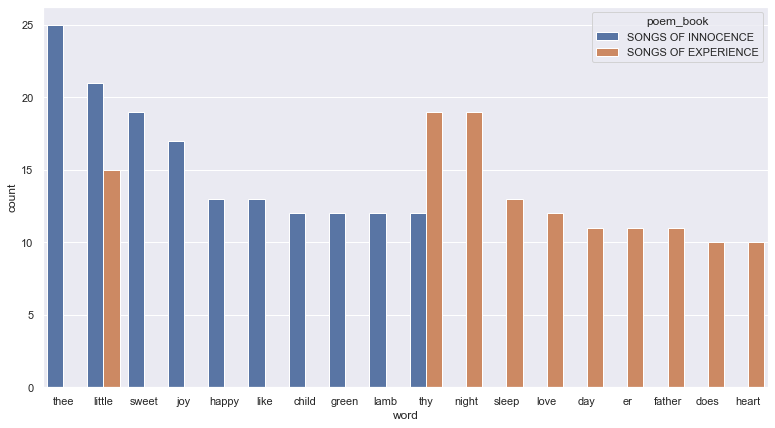

In [206]:
#plot
sns.barplot(data=data_sorted, x="word", y="count", hue="poem_book" )




### Comment on the features that are more or less frequent in one book than another.

In the book "The songs of innocence" the most common words seem to refer to positive emotions (happy, joy, sweet). There is also the word "child". In general, this finding is consistent with the title of the book. The same can be said for the book "The song of experience". Indeed, the words "night", "sleep", "father", make us think about the end of a day, which in a methaphorical sense, can be understood as a later stage of life. 